In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [164]:
df = pd.read_csv('USA_Housing.csv')

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [166]:
df_numeric = df.select_dtypes(include="number")
df_numeric.corr()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


In [167]:
df.isna().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [168]:
df.duplicated().sum() # to be done before

np.int64(0)

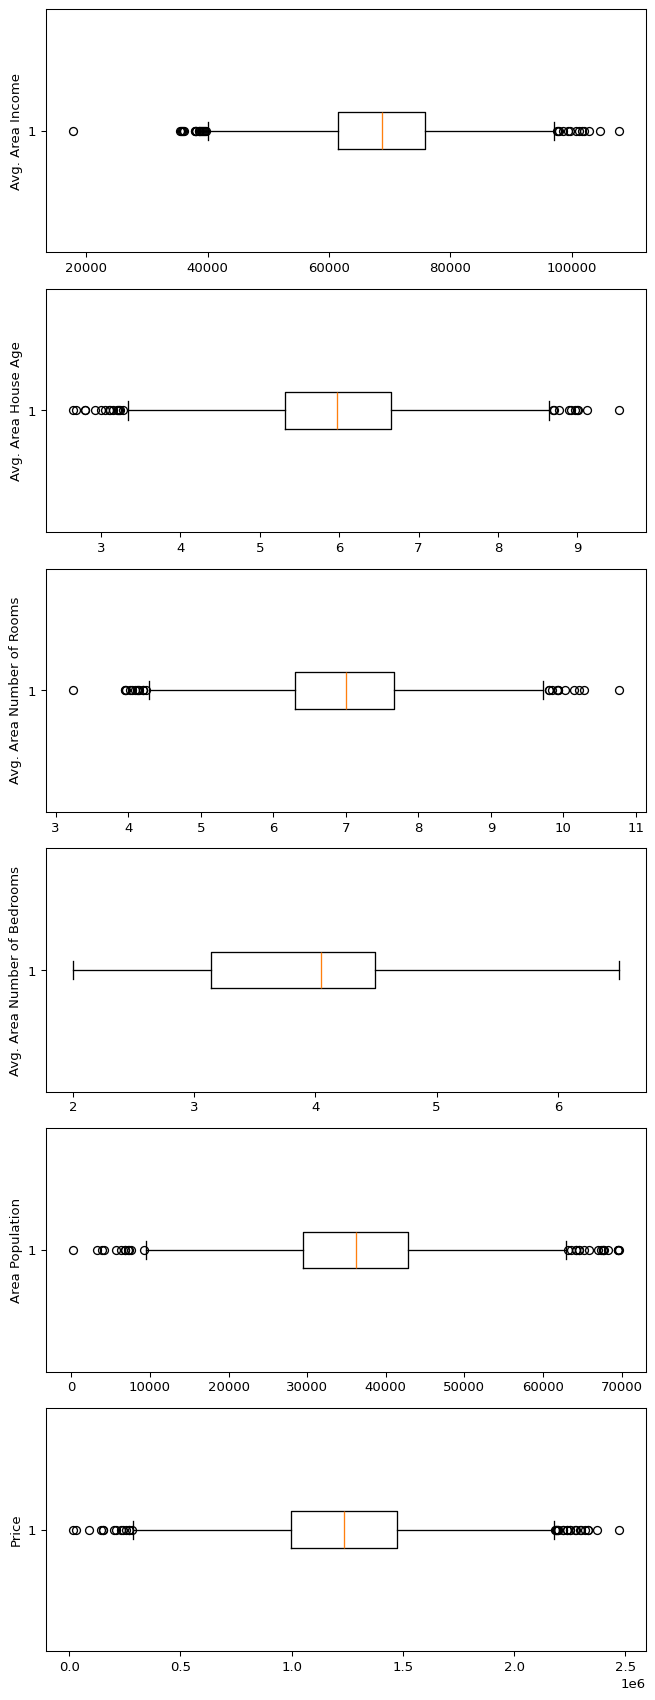

In [169]:
df.describe()

# Get numeric columns only
numeric_cols = df.select_dtypes(include='number').columns
fig, axs = plt.subplots(len(numeric_cols), 1, figsize=(7, 18), dpi=95)
if len(numeric_cols) == 1:
    axs = [axs]
for i, col in enumerate(numeric_cols):
    axs[i].boxplot(df[col], vert=False)
    axs[i].set_ylabel(col)
plt.tight_layout()
plt.show()

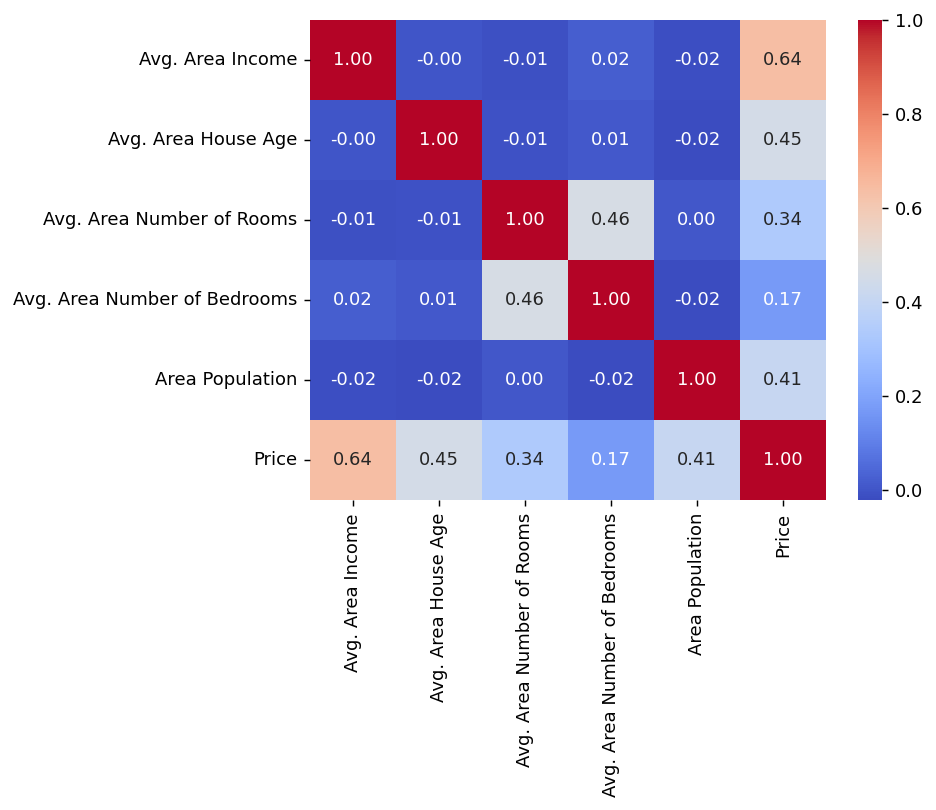

In [170]:
corr = df_numeric.corr()
plt.figure(dpi=130)
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()



In [171]:
# Step-by-step outlier removal
# Step 1: Select only numeric columns
df_numeric_cols = df.select_dtypes(include="number")
print(f"Step 1 - Original shape: {df_numeric_cols.shape}")

# Step 2: Remove outliers for each numeric column using IQR method
df_clean = df_numeric_cols.copy()

for col in df_clean.columns:
    q1_col = df_clean[col].quantile(.25)
    q3_col = df_clean[col].quantile(.75)
    IQR_col = q3_col - q1_col
    lower_col = q1_col - 1.5 * IQR_col
    upper_col = q3_col + 1.5 * IQR_col
    df_clean = df_clean[(df_clean[col] > lower_col) & (df_clean[col] < upper_col)]
    print(f"  {col}: Removed {len(df_numeric_cols) - len(df_clean)} outliers")

print(f"Step 2 - After outlier removal: {df_clean.shape}")

# Step 3: Create correlation matrix from cleaned data
df_numeric = df_clean

Step 1 - Original shape: (5000, 6)
  Avg. Area Income: Removed 32 outliers
  Avg. Area House Age: Removed 57 outliers
  Avg. Area Number of Rooms: Removed 82 outliers
  Avg. Area Number of Bedrooms: Removed 82 outliers
  Area Population: Removed 111 outliers
  Price: Removed 144 outliers
Step 2 - After outlier removal: (4856, 6)


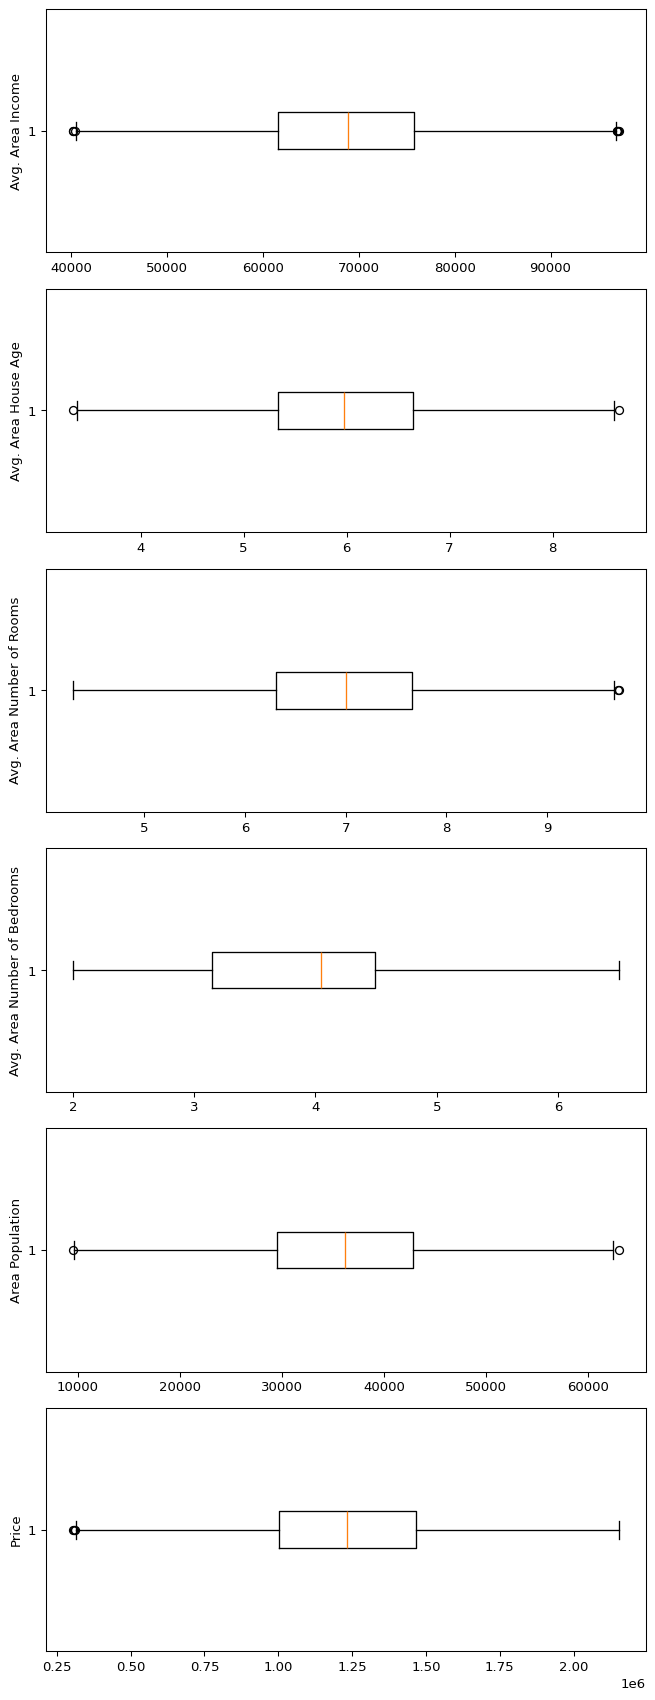

In [172]:
df.describe()

# Get numeric columns only
numeric_cols = df.select_dtypes(include='number').columns
fig, axs = plt.subplots(len(numeric_cols), 1, figsize=(7, 18), dpi=95)
if len(numeric_cols) == 1:
    axs = [axs]
for i, col in enumerate(numeric_cols):
    axs[i].boxplot(df_clean[col], vert=False)
    axs[i].set_ylabel(col)
plt.tight_layout()
plt.show()

In [173]:
df_numeric = df.select_dtypes(include="number")

In [174]:
X = df_numeric.drop(columns=['Price','Avg. Area Number of Bedrooms'])

In [175]:
y  = df_numeric['Price']

In [176]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [177]:
scalar = MinMaxScaler()

In [178]:
X_norm = scalar.fit_transform(X)

In [179]:
X_norm

array([[0.68682217, 0.44198584, 0.50150158, 0.3299422 ],
       [0.68352073, 0.48853836, 0.46450137, 0.57596801],
       [0.48373705, 0.46860901, 0.70135011, 0.52858204],
       ...,
       [0.50713527, 0.67002636, 0.20853446, 0.47651494],
       [0.55841872, 0.4203891 , 0.51757886, 0.61128233],
       [0.53071451, 0.48699729, 0.47267788, 0.66708815]], shape=(5000, 4))

In [180]:
print(f"Shape: {X_norm.shape}") 
print(f"Column names: {X.columns.tolist()}")

Shape: (5000, 4)
Column names: ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Area Population']
